In [60]:
#pip install lightgbm

In [61]:
#pip install -U imbalanced_learn

In [62]:
import numpy as np
import pandas as pd


#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt


#Machine Learning

from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,roc_auc_score,plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import RandomOverSampler
import pickle
sns.set()

#Maths
import math

#set the option
pd.set_option('display.max_rows',20)
pd.set_option('display.max_columns',500)
%matplotlib inline

In [63]:
df=pd.read_csv(r'C:\Users\LENOVO\Desktop\diabetes_binary_health_indicators_BRFSS2015.csv')

In [64]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [65]:
df['GenHlth'].unique()

array([5., 3., 2., 4., 1.])

In [66]:
df.shape

(253680, 22)

In [67]:
df.dtypes

Diabetes_binary    float64
HighBP             float64
HighChol           float64
CholCheck          float64
BMI                float64
                    ...   
DiffWalk           float64
Sex                float64
Age                float64
Education          float64
Income             float64
Length: 22, dtype: object

In [68]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [69]:
df['Diabetes_binary'].value_counts()

0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64

In [70]:
df.isnull().sum()

Diabetes_binary    0
HighBP             0
HighChol           0
CholCheck          0
BMI                0
                  ..
DiffWalk           0
Sex                0
Age                0
Education          0
Income             0
Length: 22, dtype: int64

In [71]:
#Converting data types

df.columns


Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [72]:
#df.Diabetes_binary=df.Diabetes_binary.apply(lambda x:int(x))

In [73]:
df['Sex']=df['Sex'].astype(float).astype(int)
print(df.dtypes)

Diabetes_binary    float64
HighBP             float64
HighChol           float64
CholCheck          float64
BMI                float64
                    ...   
DiffWalk           float64
Sex                  int32
Age                float64
Education          float64
Income             float64
Length: 22, dtype: object


In [74]:
#Converting datatypes

df=df.astype(float).astype(int)

print(df.dtypes)

Diabetes_binary    int32
HighBP             int32
HighChol           int32
CholCheck          int32
BMI                int32
                   ...  
DiffWalk           int32
Sex                int32
Age                int32
Education          int32
Income             int32
Length: 22, dtype: object


In [75]:
R=df.corr()
R

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.263129,0.200276,0.064761,0.216843,0.060789,0.105816,0.177282,-0.118133,-0.040779,-0.056584,-0.057056,0.016255,0.031433,0.293569,0.069315,0.171337,0.218344,0.031430,0.177442,-0.124456,-0.163919
HighBP,0.263129,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,-0.061266,-0.003972,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.200276,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,-0.039874,-0.011543,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.064761,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,0.006121,-0.023730,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.216843,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,-0.062275,-0.048736,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DiffWalk,0.218344,0.223618,0.144672,0.040585,0.197078,0.122463,0.176567,0.212709,-0.253174,-0.048352,-0.080506,-0.037668,0.007074,0.118447,0.456920,0.233688,0.478417,1.000000,-0.070299,0.204450,-0.192642,-0.320124
Sex,0.031430,0.052207,0.031205,-0.022115,0.042950,0.093662,0.002978,0.086096,0.032482,-0.091175,-0.064765,0.005740,-0.019405,-0.044931,-0.006091,-0.080705,-0.043137,-0.070299,1.000000,-0.027340,0.019480,0.127141
Age,0.177442,0.344452,0.272318,0.090321,-0.036618,0.120641,0.126974,0.221618,-0.092511,0.064547,-0.009771,-0.034578,0.138046,-0.119777,0.152450,-0.092068,0.099130,0.204450,-0.027340,1.000000,-0.101901,-0.127775
Education,-0.124456,-0.141358,-0.070802,0.001510,-0.103932,-0.161955,-0.076009,-0.099600,0.199658,0.110187,0.154329,0.023997,0.122514,-0.100701,-0.284912,-0.101830,-0.155093,-0.192642,0.019480,-0.101901,1.000000,0.449106


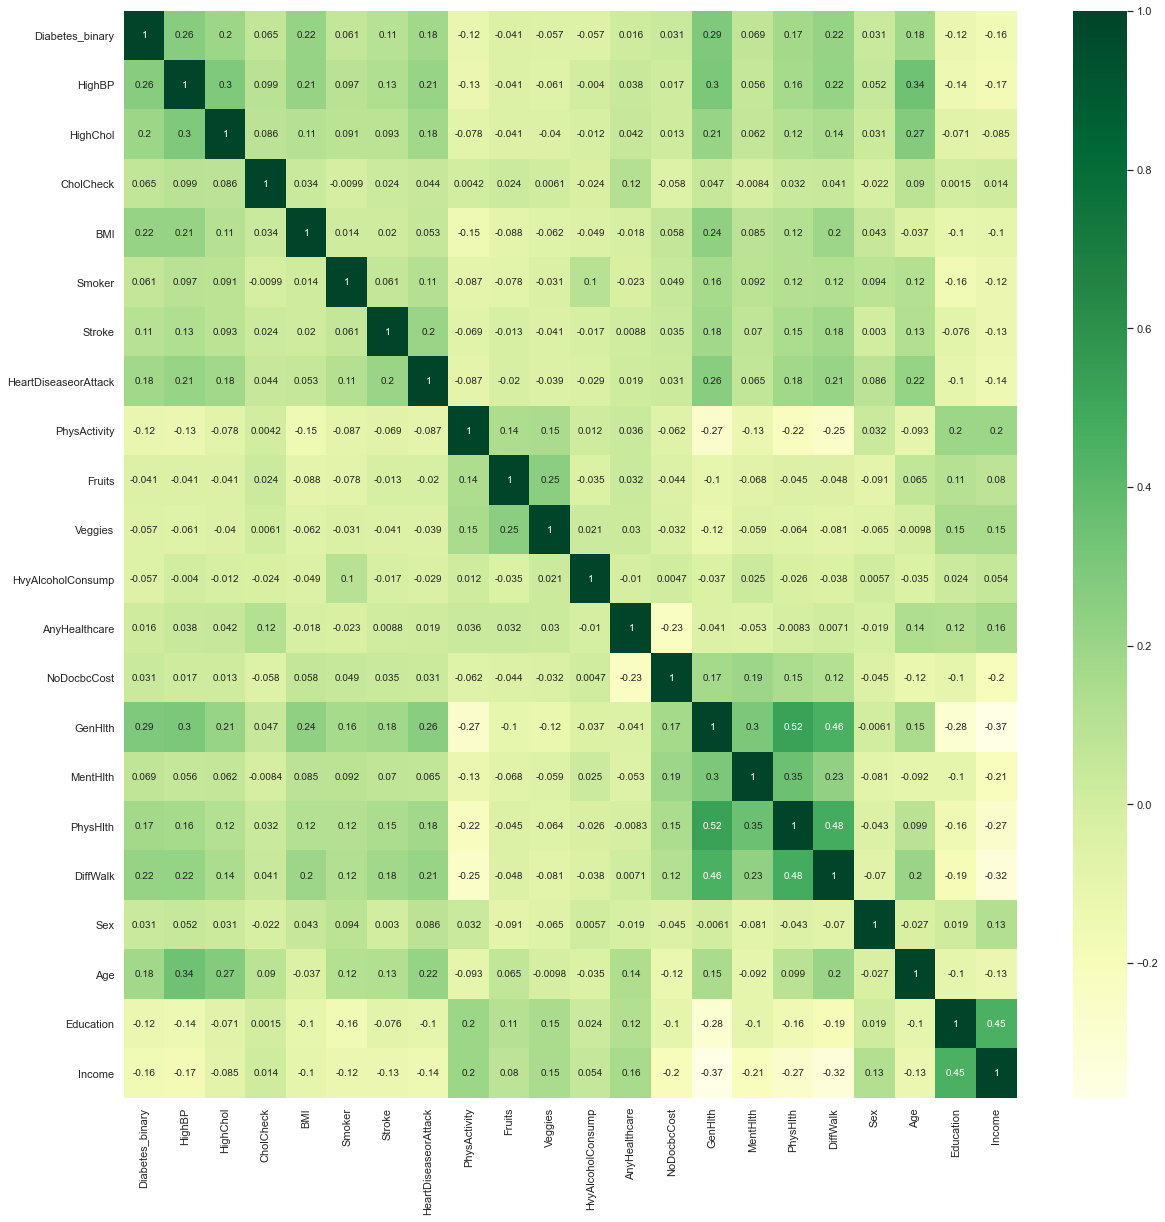

In [76]:
plt.figure(figsize=(20,20))
sns.heatmap(R, annot=True,cmap='YlGn')
plt.savefig('heatchart.png')

Feature Scaling

In [77]:
scaler = StandardScaler()

X= df.drop('Diabetes_binary', axis=1) #assign all features to x


y = df['Diabetes_binary'] #assign the target to the variable y

In [78]:
from sklearn.feature_selection import mutual_info_classif

mutual_info_classif (X,y)


imp=pd.DataFrame(mutual_info_classif(X,y),index=X.columns)

imp

imp.columns=['Importance']

imp.sort_values(by='Importance',ascending=False)

,Importance
GenHlth,0.055242
CholCheck,0.046997
AnyHealthcare,0.043371
HighBP,0.041980
PhysActivity,0.033689
...,...
Sex,0.008524
Stroke,0.005005
MentHlth,0.003392
HvyAlcoholConsump,0.003005


In [79]:
imp[imp['Importance']>=0.03].sort_values(by='Importance', ascending = False)

,Importance
GenHlth,0.055242
CholCheck,0.046997
AnyHealthcare,0.043371
HighBP,0.041980
PhysActivity,0.033689
Veggies,0.032925


In [80]:
X=X[['GenHlth','CholCheck','AnyHealthcare','HighBP','PhysActivity','Veggies']] #Feature Selection

X

,GenHlth,CholCheck,AnyHealthcare,HighBP,PhysActivity,Veggies
0,5,1,1,1,0,1
1,3,0,0,0,1,0
2,5,1,1,1,0,0
3,2,1,1,1,1,1
4,2,1,1,1,1,1
...,...,...,...,...,...,...
253675,3,1,1,1,0,1
253676,4,1,1,1,0,0
253677,1,1,1,0,1,0
253678,3,1,1,1,0,1


In [81]:
scaler.fit(X)

StandardScaler()

In [82]:
X = scaler.transform(X) #notice we drop the target before applying 

In [83]:
X[0]

array([ 2.32912057,  0.19692156,  0.22686264,  1.15368814, -1.76281393,
        0.48208665])

Train_Test Split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=123)

Model Building

In [110]:
input_ml_algo = 'LR'

In [111]:
#select the algorithm according to the input provided

def model_to_use(input_ml_algo):
    if input_ml_algo == 'DT':
        model = DecisionTreeClassifier()
    elif input_ml_algo == 'RF':
        model = RandomForestClassifier()
    elif input_ml_algo == 'XGBC':
        model = XGBClassifier()
    elif input_ml_algo == 'LGBMC':
        model= LGBMClassifier()
    elif input_ml_algo == 'LR':
        model=LogisticRegression()
    return model

In [124]:
model=model_to_use('LR')
model

LogisticRegression()

In [125]:
#Training the model;
model.fit(X_train, y_train)

model

LogisticRegression()

In [126]:
y_pred = model.predict(X_test)

#predict probability for test dataset
y_pred_prod = model.predict_proba(X_test)
y_pred_prod = [x[0] for x in y_pred_prod]
print("Y predicted : ", y_pred)
print("Y probability predicted: ", y_pred_prod[:5])

Y predicted :  [0 0 0 ... 0 0 0]
Y probability predicted:  [0.9484086428089484, 0.9568596913845856, 0.9130337210462095, 0.7978389510838555, 0.9720210657170643]


model Evaluation


 Accuracy Score : 
  0.8578918322295805

 AUC Score : 
  0.5396719084461777

 Confusion Matrix : 
  [[64243  1276]
 [ 9539  1046]]

 Classification Report : 
                precision    recall  f1-score   support

           0       0.87      0.98      0.92     65519
           1       0.45      0.10      0.16     10585

    accuracy                           0.86     76104
   macro avg       0.66      0.54      0.54     76104
weighted avg       0.81      0.86      0.82     76104


 ROC curve : 



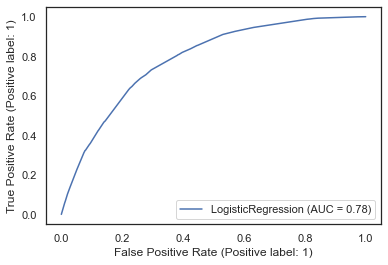

In [127]:
def compute_evaluation_metric(model, x_test, y_actual, y_predicted, y_predicted_prob):
    print("\n Accuracy Score : \n ", accuracy_score(y_actual,y_predicted))
    print("\n AUC Score : \n ", roc_auc_score(y_actual,y_predicted))
    print("\n Confusion Matrix : \n ", confusion_matrix(y_actual,y_predicted))
    print("\n Classification Report : \n ", classification_report(y_actual,y_predicted))

    print("\n ROC curve : \n")
    sns.set_style("white")
    plot_roc_curve(model, x_test, y_actual)
    plt.show()
compute_evaluation_metric(model, X_test, y_test, y_pred, y_pred_prod)

In [128]:
df['Diabetes_binary'].value_counts()

0    218334
1     35346
Name: Diabetes_binary, dtype: int64

Optimization

In [129]:
ros=RandomOverSampler()
X_ros, y_ros=ros.fit_resample(X,y)
y_ros.value_counts()

1    218334
0    218334
Name: Diabetes_binary, dtype: int64

In [130]:
X_ros[0]

array([ 2.32912057,  0.19692156,  0.22686264,  1.15368814, -1.76281393,
        0.48208665])

In [131]:
def classification_model(X,y):
    x= scaler.fit_transform(X)
    
    #split the dataset into the training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X_ros,y_ros,test_size=0.3, random_state=123)
    
    #train the model
    model.fit(X_train,y_train)
    
    #predict class for test dataset
    y_pred = model.predict(X_test)
    
    
    #predict probability for test dataset
    y_pred_prod = model.predict_proba(X_test)
    y_pred_prod = [x[1] for x in y_pred_prod]
    
    
    # Compute Evaluation Metric
    
    compute_evaluation_metric(model, X_test, y_test, y_pred, y_pred_prod)
    
    return model
    


 Accuracy Score : 
  0.7151014114396074

 AUC Score : 
  0.7151020530546159

 Confusion Matrix : 
  [[46231 19274]
 [18048 47448]]

 Classification Report : 
                precision    recall  f1-score   support

           0       0.72      0.71      0.71     65505
           1       0.71      0.72      0.72     65496

    accuracy                           0.72    131001
   macro avg       0.72      0.72      0.72    131001
weighted avg       0.72      0.72      0.72    131001


 ROC curve : 



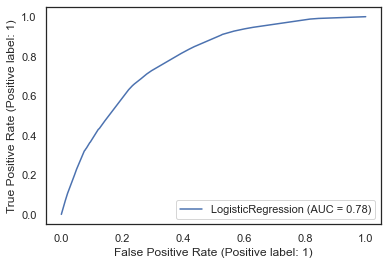

LogisticRegression()

In [132]:
classification_model(X_ros, y_ros)

In [96]:
#define the parameters grid for decision tree

param_grid_decision_tree = {'criterion': ['gini', 'entropy'], 
                            'max_depth': [10,15,20,30,40,50],
                           'min_samples_leaf': [1,2,3]
                           }


#define the parameters grid for random forest
param_grid_random_forest = {'max_depth': [10,20,40], 
                            'n_estimators': [100,200,300],
                           'min_samples_leaf': [1,2,3]
                           }



#define the parameters grid for xgboost
param_grid_xgb = {'min_child_weight': [1,5,10], 
                 'gamma': [0,1],
                 'max_depth': [5,10],
                 'learning_rate': [0.05,0.1], 
                  }



#define the parameters grid for LGBM
param_grid_lgbm = {'n_estimator': [100,200], 
                 'num_leaves': [250,128],
                 'max_depth': [5,8,10],
                 'learning_rate': [0.05,0.1], 
                  }


In [97]:
def param(input_ml_algo):
    if input_ml_algo == 'DF':
        model = DecisionTreeClassifier()
        param_grid = param_grid_decision_tree
    elif input_ml_algo == 'RF':
        model = RandomForestClassifier()
        param_grid = param_grid_random_forest
    elif input_ml_algo == 'XGBC':
        model = XGBClassifier()
        param_grid = param_grid_xgb
    elif input_ml_algo == 'LGBMC':
        model= LGBMClassifier()
        param_grid = param_grid_lgbm
        
    return param_grid

In [98]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [99]:
model.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [100]:
grid = GridSearchCV(model, param_grid_decision_tree, refit = True, verbose=3, n_jobs = -1)

In [101]:
# fit the model for grid search

grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 3]},
             verbose=3)

In [102]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1}

In [103]:
y_pred = grid.predict(X_test)

#predict probability for test dataset
y_pred_prod = model.predict_proba(X_test)
y_pred_prod = [x[0] for x in y_pred_prod]
print("Y predicted : ", y_pred)
print("Y probability predicted: ", y_pred_prod[:5])

Y predicted :  [0 0 0 ... 0 0 0]
Y probability predicted:  [0.7575699866692058, 0.8162638198118288, 0.5609808102345416, 0.3691860465116279, 0.8784951703101169]



 Accuracy Score : 
  0.8609140124040786

 AUC Score : 
  0.5

 Confusion Matrix : 
  [[65519     0]
 [10585     0]]

 Classification Report : 
                precision    recall  f1-score   support

           0       0.86      1.00      0.93     65519
           1       0.00      0.00      0.00     10585

    accuracy                           0.86     76104
   macro avg       0.43      0.50      0.46     76104
weighted avg       0.74      0.86      0.80     76104


 ROC curve : 



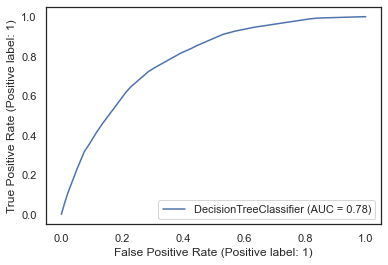

In [104]:
 compute_evaluation_metric(model, X_test, y_test, y_pred, y_pred_prod)

In [133]:
#saving the model

import pickle

In [134]:
#save the model

pickle.dump(model, open('class_model.pkl', 'wb'))

#save the scaler

pickle.dump(scaler, open('scaler2.pkl', 'wb'))

Creating prediction pipeline

In [135]:
#pip install emoji

In [136]:
%%writefile dapp.py


import streamlit as st
import pandas as pd
import numpy as np
import pickle
from PIL import Image



st.write("""
# DIABETICS STATUS PREDICTION APP!
""")

image=Image.open('diabetes.jpg')
st.image(image,caption='Diabetes Kills')
model = pickle.load(open('class_model.pkl', 'rb'))

scaler=pickle.load(open('scaler2.pkl', 'rb'))

st.sidebar.header('User Input Parameters')



def user_input_features():
    GenHlth = st.selectbox('Health Rating',('Excellent', 'Good', 'Stable', 'Bad', 'Critical'))
    if GenHlth=='Excellent':
        GenHlth=5
    if GenHlth=='Good':
        GenHlth=4
    if GenHlth=='Stable':
        GenHlth=3
    if GenHlth=='Bad':
        GenHlth=2
    else:
        GenHlth=1
    CholCheck = st.selectbox('Cholestrol Level',('High', 'Low'))
    if CholCheck=='High':
        CholCheck=1
    else:
        CholCheck=0
        
    HighBP = st.selectbox('Blood Pressure Level',('High', 'Low'))
    if HighBP=='High':
        HighBP=1
    else:
        HighBP=0
        
    AnyHealthcare = st.selectbox('Do you Have a Health Care Plan',('Yes','No'))
    if AnyHealthcare=='Yes':
        AnyHealthcare=1
    else:
        AnyHealthcare=0
   
    PhysActivity = st.selectbox('Do You engage in Regular Physical Activity', ('Yes', 'No'))
    if PhysActivity=='Yes':
        PhysActivity=1
    else:
        PhysActivity=0
        

    Veggies=st.selectbox('Do You Take Vegetables',('Yes','No'))
    if Veggies=='Yes':
        Veggies=1
    else:
        Veggies=0
        
    data = {'GenHlth':GenHlth,
           'CholCheck':CholCheck,
           'HighBP':HighBP,
           'AnyHealthcare':AnyHealthcare,
           'PhysActivity':PhysActivity,
           'Veggies':Veggies}
    
    features = pd.DataFrame(data, index=[0])
    return features
input_df = user_input_features()
input_df = scaler.transform(input_df)


if st.button('PREDICT'):
    y_out=model.predict(input_df)
    if y_out[0]==1:
        st.write(f' You have a high risk of Diabeties')
    else:
        st.write(f' You are not at risk of Diabetes')
   
    




Overwriting dapp.py


In [137]:
!streamlit run dapp.py

^C
